In [40]:
root='/content/drive/MyDrive/Colab Notebooks'

In [41]:
import os 
os.chdir(root)

In [42]:
assert root==os.getcwd()

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.style.use('fivethirtyeight')

In [56]:
import joblib #to save model

In [57]:
class Perceptron:
  def __init__(self,eta,epochs):
    self.eta=eta
    self.epochs=epochs
    self.weights=np.random.randn(3)*1e-4
  def activation_function(self,inputs,weights):
    z=np.dot(inputs,weights)
    return np.where(z>0,1,0)
  def fit(self,X,Y):
    self.X=X
    self.Y=Y
    X_with_bias=np.c_[self.X,-np.ones((len(self.X),1))]
    for epoch in range(self.epochs):
      print("--"*10)
      print(f"for epoch: {epoch}")
      print("--"*10)
      y_hat=self.activation_function(X_with_bias,self.weights)
      print(f"predicted value after forward pass: \n{y_hat}")
      self.error=self.Y-y_hat
      print(f"error: \n{self.error}")
      self.weights=self.weights+self.eta*np.dot(X_with_bias.T,self.error)
      print(f"updated weights after epoch:\n{epoch}/{self.epochs} : \n{self.weights}")
      print("#####"*10)
  def predict(self,X):
      X_with_bias=np.c_[X,-np.ones((len(X),1))]
      return self.activation_function(X_with_bias,self.weights) 

  def total_loss(self):
      total_loss=np.sum(self.error)
      print(f"total loss: {total_loss}")
      return total_loss

In [58]:
def prepare_data(df):
  X = df.drop("y", axis=1)
  y = df["y"]
  return X, y

In [59]:
AND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,0,0,1],
}

df = pd.DataFrame(AND)

In [60]:
X,y = prepare_data(df)
ETA = 0.3
EPOCHS = 10
model = Perceptron(eta=ETA, epochs=EPOCHS)
model.fit(X, y)
_ = model.total_loss()

--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[0 1 1 1]
error: 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch:
0/10 : 
[-0.29985194 -0.29993376  0.60003645]
##################################################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch:
1/10 : 
[1.48056541e-04 6.62419405e-05 3.00036453e-01]
##################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch:
2/10 : 
[3.00148057e-01 3.00066242e-01 3.64531833e-05]
##################################################
--------------------
for epoch: 3
--------------------
predicted value after forward pass: 
[0 1 1 1]
error: 
0    0
1   -1


In [61]:
inputs = np.array([[1,1], [0,1]])
model.predict(inputs)

array([1, 0])

In [62]:
def save_model(model,filename):
  model_dir='models'
  os.makedirs(model_dir,exist_ok=True)
  filepath=os.path.join(model_dir,filename)
  joblib.dump(model,filepath)


In [63]:
save_model(model, "and.model")

In [64]:
loaded_model = joblib.load("models/and.model")
loaded_model.predict(inputs)

array([1, 0])

In [71]:
def save_plot(df,file_name,model):
  def _create_base_plot(df):
    df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="winter")
    plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
    plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
    figure = plt.gcf() # get current figure
    figure.set_size_inches(10, 8)
  def _plot_decision_regions(X,Y,model,resolution=0.2):
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[: len(np.unique(y))])

    X = X.values # as a array
    x1 = X[:, 0] 
    x2 = X[:, 1]
    x1_min, x1_max = x1.min() -1 , x1.max() + 1
    x2_min, x2_max = x2.min() -1 , x2.max() + 1  

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    plt.plot()

  X, y = prepare_data(df)

  _create_base_plot(df)
  _plot_decision_regions(X, y, model)
  plot_dir = "plots"
  os.makedirs(plot_dir, exist_ok=True) # ONLY CREATE IF MODEL_DIR DOESN"T EXISTS
  plotPath = os.path.join(plot_dir, file_name) # model/filename
  plt.savefig(plotPath)

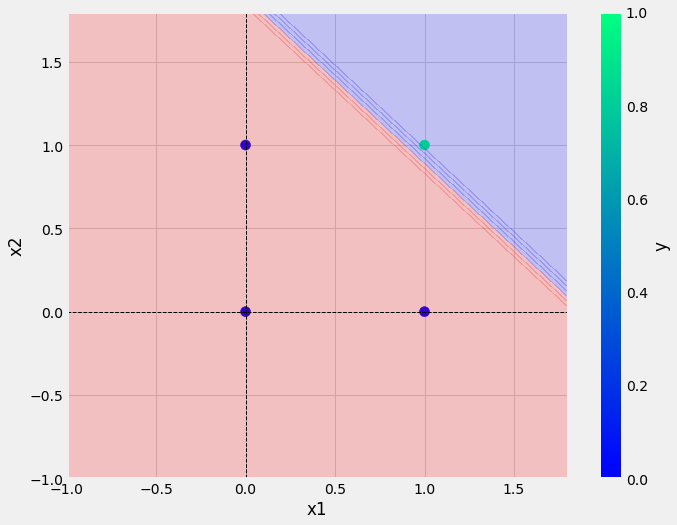

In [72]:
save_plot(df, "and.png",model)